

## Logistic regression


In [70]:
# Import libraries: 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import celluloid
from celluloid import Camera
from scipy.special import expit
from matplotlib import gridspec

# Define logistic regression model: 
class LogisticRegression(object):
    def __init__(self,x,y, lr=0.01):
        self.lr=lr
        n=x.shape[1] # determine the number of independent variables
        self.w=np.ones((1,n))*(0) # initialize weight matrix and set weights to zero    
        self.b=0.5 # set starting value for b to 0.5 
        
    def predict(self,x): # returns prediction
        z=x@self.w.T  + self.b   # @: matrix multiplication 
        p=expit(z)  # logistic sigmoid function
        return p

    def cost(self, x,y): #cost function
        z=x@self.w.T  + self.b
        p=expit(z)
        return - np.mean(y*np.log(p) + (1-y)*np.log(1-p)) #Cross-entropy cost function
    
    def step(self,x,y):
        z=x@self.w.T  + self.b
        p=expit(z)
    
        # Partial derivatives:       
        dw= np.mean((p - y)*x, axis=0)    # dJ/dw
        db = np.mean(p-y)               # dJ/db
        self.w = self.w - dw*self.lr # update w
        self.b= self.b- db*self.lr  # update b
        
    def fit(self,x,y,numberOfEpochs=100000):
        # Create arrays to store weights, biases, costs, predicted y-values for plots..
            #... and predicted y-values for connection lines in: 
        self.AllWeights=np.zeros((numberOfEpochs, x.shape[1]))
        self.AllBiases=np.zeros((numberOfEpochs, x.shape[1]))
        self.AllCosts=np.zeros((numberOfEpochs, x.shape[1]))
        self.All_cl= np.zeros((numberOfEpochs,len(x))) # cl: # predicted y-values for connection lines
        
        for step in range(numberOfEpochs):
            # for each step of gradient descent assign new parameter value to respective array element: 
            self.AllWeights[step]=self.w  
            self.AllBiases[step]=self.b
            self.AllCosts[step]=self.cost(x,y)
            self.All_cl[step]=(self.predict(x)).T.flatten() 
            self.step(x,y) # update parameter values

In [80]:
# Introduce training data:  
x_train = np.array([
    [-80],
    [-70],
    [-50],
    [-39],
    [-27],
    [-15],
    [-9],
    [12],
    [25],
    [36],
    [52],
    [65],
    [78],
    [90],
    [99],
    [110]
])

y_train = np.array([
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [1],
    [0],
    [1],
    [0],
    [1],
    [0],
    [1],
    [1],
    [1],
    [1]
])

xs=np.array([np.linspace(-150,200)]) # x-values later used for regression curve plot

# Fit model to training data: 
model=LogisticRegression(x_train,y_train, lr=0.0001) # set up model and define learning rate
model.fit(x_train,y_train, numberOfEpochs=700000) # set number of epochs

# Store parameter values in new variables:    
w=model.AllWeights.T
b= model.AllBiases
c=model.AllCosts
cl=model.All_cl

# Print results: 
print("Final weight: "+ str(np.float(model.w))) 
print("Final bias: "+ str(model.b))
print("Final costs: " + str(model.cost(x_train,y_train)))

Final weight(s): 0.0358378946387266
Final bias: -1.116903840009302
Final costs: 0.40058199922669563


In [81]:
# cross-check results with sklearn's inbuilt logistic regression model: 
from sklearn.linear_model import LogisticRegression
# - set C (= Inverse of regularization strength) to a very high number
# - use np.ravel() to prevent DataConversionWarning
clf = LogisticRegression(solver="lbfgs", random_state=0, C = 1e20).fit(x_train, y_train.ravel())
print(clf.coef_, clf.intercept_)

pred=expit(x_train @ clf.coef_.T + clf.intercept_) # calculate respective costs ...
#... for sklearn's fitted model parameters
print(- np.mean(y_train*np.log(pred) + (1-y_train)*np.log(1-pred)))

[[0.03586354]] [-1.11926705]
0.40058175764105697


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


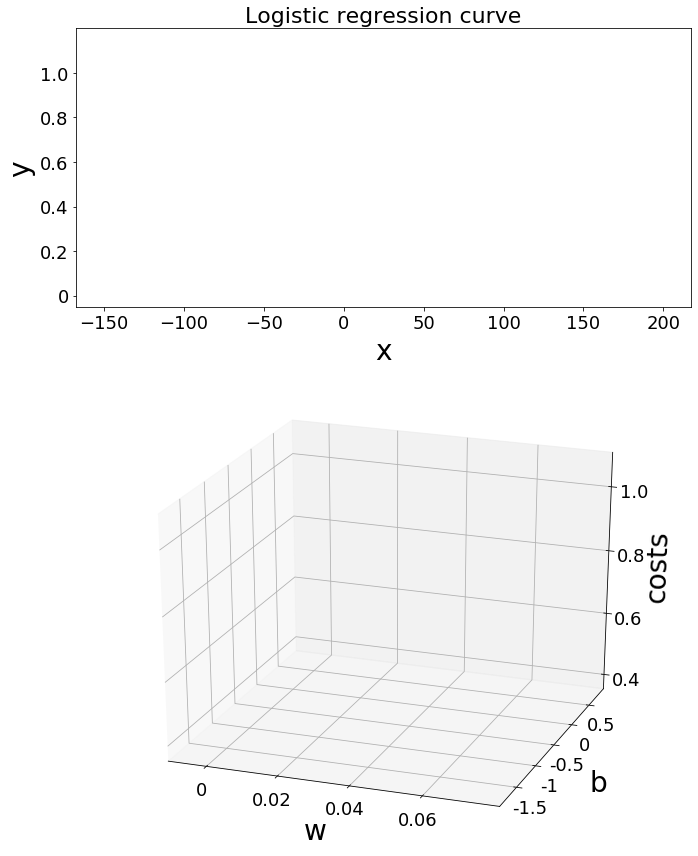

In [58]:
# Regression curve
def pred_curve(xs,w0,b0):  # predict y-values for regression curve
    z=xs.T@w0.T  + b0   
    p=expit(z)  
    return p

# Create data for surface plot: 
def CrossEntropy_cost(x,y,w0,b0):  # returns costs for every pair of w and b. 
        p=expit(x @ w0.T + b0)
        return - np.mean(y*np.log(p) + (1-y)*np.log(1-p))

ws = np.linspace(-0.005, 0.075, 40) # set range of values for w ... 
bs = np.linspace(-1.75, 0.75, 40)  # ... and b for surface plot
M, B = np.meshgrid(ws, bs) # create meshgrid for surface plot
zs = np.array([CrossEntropy_cost(x_train,y_train,       # determine costs for each pair of w and b 
                       np.array([[wp]]), np.array([[bp]]))  # CrossEntropy_cost() only accepts wp and bp as matrices. 
               for wp, bp in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape) # get z-values for surface plot in shape of M.

# Define which epochs to plot: 
a1=np.arange(0,20,1).tolist() 
a2=np.arange(20,100,20).tolist()
a3=np.arange(100,500,200).tolist()
a4=np.arange(500,40000,4000).tolist()
a5=np.arange(40000,600000,20000).tolist()
points_ = a1+a2+a3+a4+a5

# Create first animation (regression curve & surface plot):
fig = plt.figure(figsize=(10,12)) # create figure
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1.7]) # set height ratios of subplots

label_font_size = 28 # size of label fonts
tick_label_size= 18 # size of tick labels

# Customize subplots: 
ax0=fig.add_subplot(gs[0]) # add first subplot to figure
ax0.set_title("Logistic regression curve", fontsize=22) #set title
ax0.tick_params(axis='both', which='major', labelsize=tick_label_size) # set tick label size
ax0.set_xlabel("x", fontsize=label_font_size, labelpad=5) # set axis labels
ax0.set_ylabel("y", fontsize=label_font_size, labelpad=5)
ax0.tick_params(axis='both', which='major',
                labelsize=tick_label_size) 
ax0.set_ylim([-0.05, 1.2]) # set range for y-values in the plot
ax0.set_yticks([0,0.2,0.4,0.6,0.8, 1]) # set y-axis ticks
ax0.set_yticklabels(["0","0.2","0.4","0.6","0.8", "1.0"], # label y-ticks
                    fontsize=tick_label_size)
ax1=fig.add_subplot(gs[1], projection="3d") # add second subplot 
ax1.view_init(elev=25, azim=-70) # set view
ax1.set_xlabel("w", fontsize=label_font_size, labelpad=16) 
ax1.set_ylabel("b", fontsize=label_font_size, labelpad=18)
ax1.set_zlabel("costs", fontsize=label_font_size, labelpad=13)  
ax1.tick_params(axis='both', which='major', labelsize=tick_label_size) 
ax1.set_xticks([0, 0.02,0.04,0.06]) 
ax1.set_xticklabels(["0", "0.02","0.04","0.06"], fontsize=tick_label_size)
ax1.set_yticks([-1.5,-1, -0.5,0,0.5]) 
ax1.set_yticklabels(["-1.5","-1", "-0.5","0","0.5"], fontsize=tick_label_size)
ax1.set_zticks([0.4,0.6, 0.8,1.0]) 
ax1.set_zticklabels(["0.4","0.6", "0.8","1.0"], fontsize=tick_label_size)
ax1.tick_params(axis='z', pad=7, which='major', labelsize=tick_label_size) 
plt.tight_layout() # adjusts subplots to figure area

camera = Camera(fig)  # create camera 
for i in points_:
    
    # Plot logistic regression curve: 
    ys = pred_curve(xs,np.array([w.flatten()[i]]),b.flatten()[i]) #calculate y-values for reg. curve
    leg=ax0.plot(xs.flatten(),ys.flatten(),
                 color='r', label=str(i))
    
    # Scatter plot of training data:
    ax0.scatter(x_train, y_train, color='b',marker='x', s=92) # plot training data points
    ax0.legend(leg,[f'costs: {np.round(c.flatten()[i],3)}'], # customize legend
               loc='upper left', fontsize=18)
    
    # Plot connecting lines (between predicted y-values and training data points):
    cl_=cl[i]
    for j in range(len(y_train)):    
        x,y = [x_train[j],x_train[j]],[float(y_train[j]),cl_[j]]
        ax0.scatter(x,y, color='black',s=0.5)
        ax0.plot(x,y, color='black', linewidth=1.5, 
                 linestyle='dashed', alpha=0.4)
        
    # Surface plot of costs:
    ax1.plot_surface(M, B, Z, rstride=1, cstride=1, 
                     alpha=0.80,cmap=cm.coolwarm) 
    
    # Plot trajectory of gradient descent:
    ax1.plot(w.flatten()[0:i],b.flatten()[0:i], 
             c.flatten()[0:i], linestyle="dashed",
             linewidth=2.5, color="black")
    ax1.scatter(w.flatten()[i],b.flatten()[i],   
                c.flatten()[i], marker="o",s=70*2, color="black")
    
    # Customize legend: 
    ax1.legend(leg,[f'epochs: {i}'], 
               loc='upper left', fontsize=18)
    
    camera.snap() # take snapshot after each frame/iteration
    
# Create animation: 
animation = camera.animate(interval = 100, # set delay between frames in milliseconds.
                          repeat = False, repeat_delay = 0) 
# Save animation: 
#animation.save('LogReg_1.gif', writer = 'imagemagick') 

#print("Final weights: "+ str(w.flatten()[i]))    # 0.03579113198262307
#print("Final bias: "+ str(b[i]))                 # [-1.11258967]
#print("Final costs: " + str(c[i]))               # [0.40058369]

# Multiple logistic regression
(fixed-intercept model)

In [77]:
# Introduce new training data with two independent variables: 
x_train2 = np.array([    
    [-9,-7],
    [-5,-4],
    [-0.5,-3.6],
    [-5.3,3.5],
    [-1.2,1.7],
    [0.1,-1.5],
    [-0.5,8.2],
    [-3.1,-1.2],
    [-2,-5.8],
    [0.3,-4.4],
    [5.5,-2.3],
    [0.6,-3.1],
    [5,-1.3],
    [8,-5.4],
    [-3,-0.4],
    [6,6.9],
    [8,9]
])

y_train2 = np.array([
    [0],
    [0],
    [1],
    [0],
    [1],
    [0],
    [1],
    [0],
    [1],
    [0],
    [1],
    [1],
    [0],
    [0],
    [1],
    [1],
    [1]
])

# Train multiple logistic regression model: 
epochs_=100000 # number of epochs for training 
model=LogisticRegression(x_train2,y_train2, lr=0.001)  
model.fit(x_train2,y_train2, numberOfEpochs=epochs_)

# Return final model parameters and costs: 
print("-------- Multiple logistic regression model:")
print("Final weights: "+ str(model.w))
print("Final bias: "+ str(model.b))
print("Final costs: " + str(model.cost(x_train2,y_train2)))

# Define new logistic reg. model with fixed-intercept: 
class LogisticRegression_fixed_b(object):  
    def __init__(self,x,y,b,lr=0.01):
        self.lr=lr
        n=x.shape[1]
        self.w=np.array([[-0.1,-0.1]]) # set starting values for weights to -0.1
        self.b=np.array([[b]]) # fixed value for b
        
    def predict(self,x):
        p=expit( x @self.w.T + self.b)
        return p        
            
    def cost(self,x,y):     
        p=expit(x @ self.w.T + self.b)
        return - np.mean(y*np.log(p) + (1-y)*np.log(1-p))

    def step(self, x,y):
        p=expit(x @ self.w.T + self.b)
        e = p - y        
        dw= np.mean(e*x, axis=0)    
        self.w = self.w - dw*self.lr 
        
    def fit(self, x,y, numberOfEpochs=1000000):
        self.AllWeights= np.zeros((numberOfEpochs, x.shape[1]))
        self.AllBiases= np.zeros(numberOfEpochs)
        self.AllCosts= np.zeros(numberOfEpochs)
        self.All_cl= np.zeros((numberOfEpochs,len(x))) 
        for step in range(numberOfEpochs):
            self.AllWeights[step]=self.w  
            self.AllCosts[step]=self.cost(x,y)
            self.All_cl[step]=(self.predict(x)).T.flatten() # predicted y-values for connection lines
            self.step(x,y)

# Set y-intercept value and train fixed-intercept logistic regression model:
b_fixed= float(model.b) # set b to the y-intercept value the previous model returned 
model=LogisticRegression_fixed_b(x_train2,y_train2,b_fixed, lr=0.001) 
model.fit(x_train2,y_train2, numberOfEpochs=epochs_)
    
# Stored parameter values of fixed-intercept logistic regression model: 
w0=model.AllWeights.T[0]
w1=model.AllWeights.T[1]
c=model.AllCosts
cl=model.All_cl

# Return final parameters and costs of fixed-intercept model: 
print("-------- Multiple logistic regression model (with fixed y-intercept): ")
print("Final weights: "+ str(model.w))
print("Final bias: "+ str(model.b))
print("Final costs: " + str(model.cost(x_train2,y_train2)))

-------- Multiple logistic regression model:
Final weights: [[0.08954523 0.19335918]]
Final bias: 0.30469515390677515
Final costs: 0.5868532651427398
-------- Multiple logistic regression model (with fixed y-intercept): 
Final weights: [[0.08954523 0.19335918]]
Final bias: [[0.30469515]]
Final costs: 0.5868532651427399


In [82]:
# cross-check results with sklearn's inbuilt logistic regression model:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver="lbfgs", random_state=0, C = 1e20).fit(x_train2, y_train2.ravel())  
print(clf.coef_, clf.intercept_)
pred=expit(x_train2 @ clf.coef_.T + clf.intercept_)
print(- np.mean(y_train2*np.log(pred) + (1-y_train2)*np.log(1-pred)))

[[0.08954527 0.19335923]] [0.30469334]
0.586853265143107


### Surface plot:

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


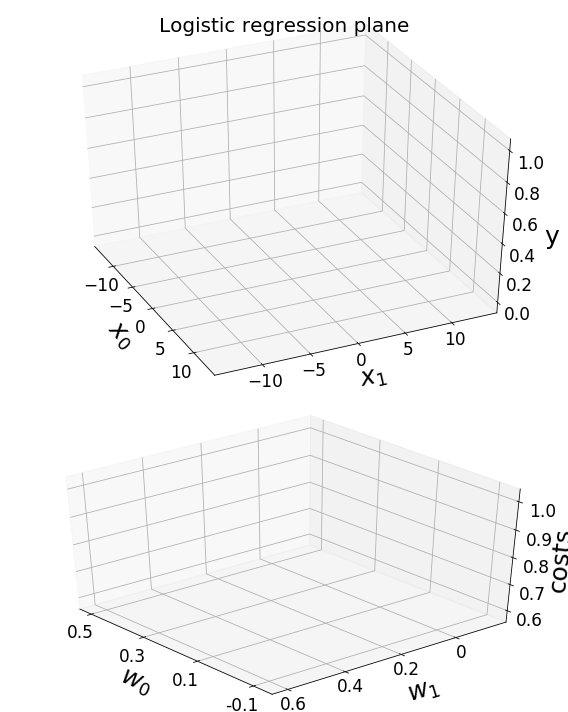

In [78]:
# Regression plane & surface plot of costs: 

#) Meshgrid for regression plane: 
def pred_plane(X,w,b):   # predicts y-values for regression plane spanned by n0s and n1s (see below)
        p=expit(X @ w.T + b)
        return p
    
n0s = np.linspace(-13, 13, 35) 
n1s = np.linspace(-13, 13, 35)
N1, N2 = np.meshgrid(n0s, n1s) # create meshgrid for regression plane


# Meshgrid for plots of costs: 
def CrossEntropy_cost(x,y,w,b):  # (same as for simple logistic regression!)
        p=expit(x @ w.T + b)
        return - np.mean(y*np.log(p) + (1-y)*np.log(1-p))
    
m0s = np.linspace(-0.12, 0.5, 35) 
m1s = np.linspace(-0.135, 0.6, 35)
M1, M2 = np.meshgrid(m0s, m1s) # create meshgrid for surface plot/contour plot
zs_1 = np.array([CrossEntropy_cost(x_train2,y_train2,       
                       np.array([[wp0,wp1]]), np.array([[b_fixed]]))
               for wp0, wp1 in zip(np.ravel(M1), np.ravel(M2))])
Z_1 = zs_1.reshape(M1.shape) # z-values of surface plot/contour plot

# Create plot:
fig = plt.figure(figsize=(8,10)) # create figure
gs = gridspec.GridSpec(2, 1, height_ratios=[1.3, 1]) # set height ratio of subplots

# Customize subplots: 
label_font_size = 25 # size of label fonts
tick_label_size= 17 # size of tick labels
ax0=fig.add_subplot(gs[0], projection="3d")
ax0.set_title("Logistic regression plane", fontsize=20) # set title
ax0.view_init(elev=38., azim=-25)
ax0.set_xlabel(r'$x_0$', fontsize=label_font_size, labelpad=8)
ax0.set_ylabel(r'$x_1$', fontsize=label_font_size, labelpad=7)
ax0.set_zlabel("y", fontsize=label_font_size, labelpad=6)
ax0.tick_params(axis='both', which='major', labelsize=tick_label_size)
ax0.tick_params(axis='x', pad=3, which='major', labelsize=tick_label_size)
ax0.tick_params(axis='y', pad=-2, which='major', labelsize=tick_label_size)
ax1=fig.add_subplot(gs[1], projection="3d")
ax1.view_init(elev=38., azim=-25)
ax1.view_init(elev=38., azim=140)  
ax1.tick_params(axis='both', which='major', labelsize=tick_label_size)
ax1.tick_params(axis='x', pad=3, which='major', labelsize=tick_label_size)
ax1.tick_params(axis='y', pad=-2, which='major', labelsize=tick_label_size)
ax1.set_xlabel(r'$w_0$', fontsize=label_font_size, labelpad=14)
ax1.set_ylabel(r'$w_1$', fontsize=label_font_size, labelpad=14)
ax1.set_zlabel("costs", fontsize=label_font_size, labelpad=3)
ax1.set_xticks([0.5, 0.3,0.1,-0.1]) 
ax1.set_xticklabels(["0.5", "0.3","0.1","-0.1"], fontsize=tick_label_size)
ax1.set_yticks([0.6,0.4,0.2,0]) 
ax1.set_yticklabels(["0.6","0.4","0.2","0"], fontsize=tick_label_size)
ax1.set_zticks([0.6,0.7,0.8,0.9,1.0]) 
ax1.set_zticklabels(["0.6","0.7","0.8","0.9","1.0"], fontsize=tick_label_size)

# Define which epochs to plot: 
a1=np.arange(0,20,2).tolist()
a2=np.arange(20,100,10).tolist()
a3=np.arange(100,200,20).tolist()
a4=np.arange(200,1700,50).tolist()
points_=a1+a2+a3+a4

camera = Camera(fig) # create camera
for i in points_:
    
    # Plot regression plane: 
    w=np.array([[w0[i],w1[i]]])
    zs_0 = np.array([pred_plane(np.array([[wp0,wp1]]),w, np.array([[b_fixed]]))  
               for wp0, wp1 in zip(np.ravel(N1), np.ravel(N2))])
    Z_0 = zs_0.reshape(N1.shape) # z-values of regression plane
    ax0.plot_surface(N1, N2, Z_0, rstride=1, cstride=1,
                     alpha=0.4,cmap=cm.coolwarm,
                     antialiased=False)
    
    # Scatter plot of training data:
    ax0.scatter(x_train2.T[0],x_train2.T[1], y_train2.flatten(), 
                marker="x",s=28*2,color="black")
    
    # Plot dashed connection lines:
    cl_=cl[i]
    for j in range(len(x_train2)):    
        x,y,z = [x_train2[j][0],x_train2[j][0]],[x_train2[j][1],x_train2[j][1]],[float(y_train2[j]),cl_[j]]
        ax0.scatter(x,y,z, color='black',s=0.5)
        ax0.plot(x,y,z, color='black', linewidth=1.5,linestyle='dashed',
                 alpha=0.4)
    
    # Surface plot of costs: 
    ax1.plot_surface(M1, M2, Z_1, rstride=1, cstride=1,
                     alpha=0.73,cmap=cm.coolwarm)
    
    # Plot trajectory of gradient descent:
    ax1.plot(w0.flatten()[0:i],w1.flatten()[0:i],c.flatten()[0:i],
             linestyle="dashed",linewidth=2, color="black")
    ax1.scatter(w0.flatten()[i],w1.flatten()[i],c.flatten()[i],
                marker="o",s=80*2, color="black")
    
    # Customize legends: 
    ax0.legend([f'costs: {np.round(c[i],3)}'], loc=(0, 0.8), 
               fontsize=17)
    ax1.legend([f'epochs: {i}'], loc=(0, 0.8),
               fontsize=17)
    
    plt.tight_layout()
    camera.snap() # take snapshot after each iteration
    
animation = camera.animate(interval = 130, 
                          repeat = False, repeat_delay = 0) # create animation 
animation.save('LogReg_2.gif', writer = 'imagemagick') # save animation   
#print("Final weights: "+ str( w0[i]) + ', ' + str( w1[i])) # 0.0894673278626509, 0.19267713058165462
#print("Final costs: " + str( c[i])) # 0.5868540471233238

### Contour plot:

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


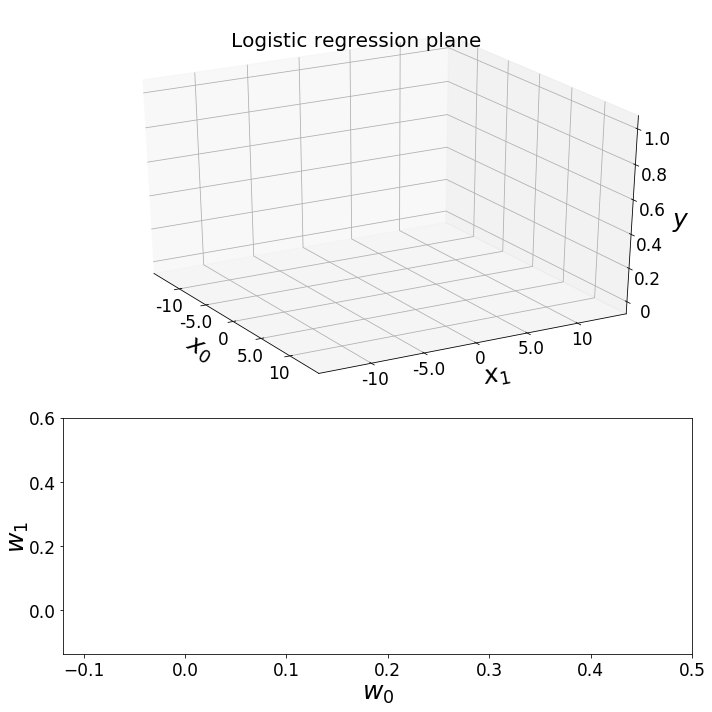

In [79]:
fig = plt.figure(figsize=(10,10)) # create figure
gs = gridspec.GridSpec(2, 1, height_ratios=[2,1.2 ]) # set width ratio of subplots

levels = [0.6,0.7,0.8] # set levels for contour lines

# Customize subplots: 
label_font_size = 25 # size of label fonts
tick_label_size= 17 # size of tick labels
fig.suptitle('Logistic regression plane', fontsize=20, y=0.95)
ax0=fig.add_subplot(gs[0], projection="3d") # configure plots as described above ...
ax0.view_init(elev=28., azim=-30)
ax0.tick_params(axis='both', which='major', labelsize=tick_label_size)
ax0.set_xlabel(r'$x_0$', fontsize=label_font_size, labelpad=9)
ax0.set_xticks([-10,-5.0,0,5.0,10]) 
ax0.set_xticklabels(["-10","-5.0","0","5.0",10], fontsize=tick_label_size)
ax0.set_yticks([-10,-5.0,0,5.0,10]) 
ax0.set_yticklabels(["-10","-5.0","0","5.0",10], fontsize=tick_label_size)
ax0.set_ylabel(r'$x_1$', fontsize=label_font_size, labelpad=9)
ax0.set_zlabel(r'$y$', fontsize=label_font_size, labelpad=5)
ax0.tick_params(axis='z', pad=5, which='major', labelsize=tick_label_size)
ax0.tick_params(axis='both', which='major', labelsize=tick_label_size)  
ax0.set_zticks([0,0.2,0.4,0.6,0.8,1]) 
ax0.set_zticklabels(["0","0.2","0.4","0.6","0.8", "1.0"], fontsize=tick_label_size)
ax0.tick_params(axis='x', pad=1, which='major', labelsize=tick_label_size)
ax0.tick_params(axis='y', pad=-2, which='major', labelsize=tick_label_size) 
ax0.tick_params(axis='z', pad=2, which='major', labelsize=tick_label_size) 
ax1=fig.add_subplot(gs[1])
ax1.tick_params(axis='both', which='major', labelsize=tick_label_size) 
ax1.set_xlabel(r'$w_0$', fontdict=None, labelpad=2, fontsize=label_font_size)
ax1.set_ylabel(r'$w_1$', fontdict=None, labelpad=-2, fontsize=label_font_size)

camera = Camera(fig)
for i in points_:
    
    # Plot regression plane: 
    w=np.array([[w0[i],w1[i]]])
    b_= b_fixed
    zs_0 = np.array([pred_plane(np.array([[wp0,wp1]]),w, np.array([[b_fixed]]))  
               for wp0, wp1 in zip(np.ravel(N1), np.ravel(N2))])
    Z_0 = zs_0.reshape(N1.shape) # z-values of regression plane
    ax0.plot_surface(N1, N2, Z_0, rstride=1, cstride=1,
                     alpha=0.4,cmap=cm.coolwarm,
                     antialiased=False)
    
    # Scatter plot of training data:
    ax0.scatter(x_train2.T[0],x_train2.T[1] ,   y_train2, marker="x", s=11**2, color="black")
    
    # Plot dashed connection lines:
    cl_=cl[i]
    for j in range(len(x_train2)):    
        x,y,z = [x_train2[j][0],x_train2[j][0]],[x_train2[j][1],x_train2[j][1]],[float(y_train2[j]),cl_[j]]
        ax0.scatter(x,y,z, color='black',s=0.5)
        ax0.plot(x,y,z, color='black', linewidth=1.5,linestyle='dashed',alpha=0.5)

    # Contour plot of costs: 
    cp = ax1.contour(M1, M2, Z_1,levels, colors='black', # contour plot
                     linestyles='dashed', linewidths=1)
    plt.clabel(cp, inline=1,fmt='%1.1f', fontsize=15 ) # add labels to contour lines
    cp = plt.contourf(M1, M2, Z_1, alpha=0.85,cmap=cm.coolwarm) # filled contour plot 
    
    # Plot trajectory of gradient descent:
    plt.scatter(w0[i],w1[i],marker='o', s=13**2, color='black' ) 
    plt.plot(w0[0:i],w1[0:i], linestyle="dashed", color='black' ) 
    
    # Customize legends:
    ax0.legend([f'costs: {np.round(c[i],3)}'], loc=(0.72, 0.80), fontsize=17) # set legend position
    ax1.legend([f'epochs: {i}'], loc=(0.72, 0.85), fontsize=17) 
    plt.tight_layout()
    camera.snap()

animation = camera.animate(interval = 100,  # "interval": delay between frames in milliseconds.
                          repeat = False, repeat_delay = 0)
animation.save('LogReg_3.gif', writer = 'imagemagick') 

### Cross-Entropy cost function (CE) vs. MSE-method (MSE):

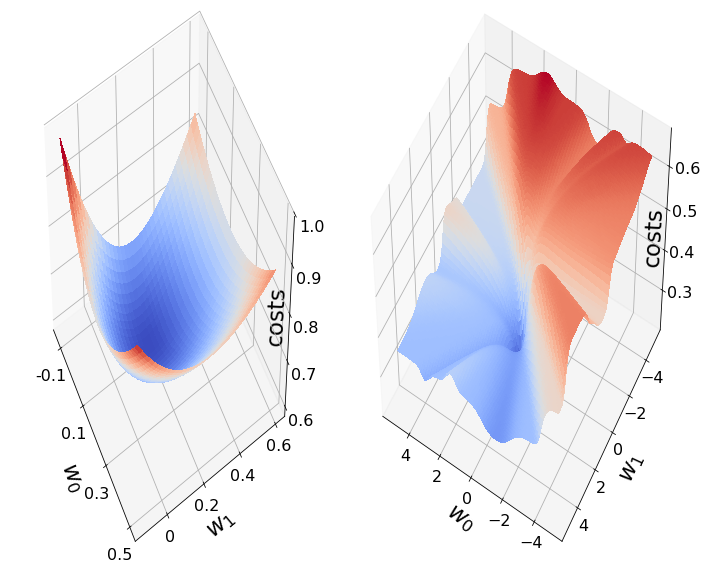

In [65]:
# CE:
w0s_ce = np.linspace(-0.12, 0.5, 35) 
w1s_ce = np.linspace(-0.12, 0.6, 35)
M1_ce, M2_ce = np.meshgrid(w0s_ce, w1s_ce) # create meshgrid
zs_ce = np.array([CrossEntropy_cost(x_train2,y_train2, # apply CE-cost function       
                       np.array([[wp0,wp1]]), np.array([[b_fixed]]))  
               for wp0, wp1 in zip(np.ravel(M1_ce), np.ravel(M2_ce))])
Z_ce = zs_ce.reshape(M1_ce.shape) # costs calculated with CE

# MSE:
def MSE_cost(x,y, w,b): # define MSE-cost function
    pred=expit(x @ w.T + b)
    # Calculate mean squared error between predicted and actual y-values: 
    mse=np.mean((y-pred)**2,axis=0) 
    return mse

m0s_mse = np.linspace(-5, 5, 100) 
m1s_mse = np.linspace(-5, 5,100)
M1_mse, M2_mse = np.meshgrid(m0s_mse, m1s_mse) # create meshgrid
zs_mse = np.array([MSE_cost(x_train2,y_train2,       # apply MSE-cost function 
                       np.array([[wp0,wp1]]), np.array([[b_fixed]]))  
               for wp0, wp1 in zip(np.ravel(M1_mse), np.ravel(M2_mse))])
Z_mse = zs_mse.reshape(M1_mse.shape)# costs calculated with MSE

fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1.2]) # set width ratio
ax0=fig.add_subplot(gs[0],projection='3d')
ax1=fig.add_subplot(gs[1],projection='3d')

# Customize subplots: 
tick_label_size=16  
label_font_size=23 
ax0.view_init(elev=50., azim=-30)
ax0.tick_params(axis='both', which='major', labelsize=tick_label_size)
ax0.set_xlabel(r'$w_0$', fontsize=label_font_size, labelpad=12)
ax0.set_ylabel(r'$w_1$', fontsize=label_font_size, labelpad=5)
ax0.set_zlabel("costs", fontsize=label_font_size, labelpad=-33)
ax0.tick_params(axis='both', which='major',
                labelsize=tick_label_size) 
ax0.tick_params(axis='x', pad=7, which='major', labelsize=tick_label_size) 
ax0.tick_params(axis='y', pad=0, which='major', labelsize=tick_label_size) 
ax0.tick_params(axis='z', pad=7, which='major', labelsize=tick_label_size) 
ax0.set_xticks([0.5, 0.3,0.1,-0.1]) 
ax0.set_xticklabels(["0.5", "0.3","0.1","-0.1"], fontsize=tick_label_size)
ax0.set_yticks([0.6,0.4,0.2,0]) 
ax0.set_yticklabels(["0.6","0.4","0.2","0"], fontsize=tick_label_size)
ax0.set_zticks([0.6,0.7,0.8,0.9,1.0]) 
ax0.set_zticklabels(["0.6","0.7","0.8","0.9","1.0"], fontsize=tick_label_size)
ax1.view_init(azim=120,elev=50)
ax1.tick_params(axis='both', which='major', labelsize=tick_label_size)
ax1.set_xlabel(r'$w_0$', fontsize=label_font_size, labelpad=3)
ax1.set_ylabel(r'$w_1$', fontsize=label_font_size, labelpad=6)
ax1.set_zlabel("costs", fontsize=label_font_size, labelpad=-31)
ax1.tick_params(axis='both', which='major',
                labelsize=tick_label_size) 
ax1.tick_params(axis='x', pad=0, which='major', labelsize=tick_label_size) 
ax1.tick_params(axis='y', pad=0, which='major', labelsize=tick_label_size) 
ax1.tick_params(axis='z', pad=7, which='major', labelsize=tick_label_size) 

# Surface plots of costs calculated with CE: 
ax0.plot_surface(M1_ce, M2_ce, Z_ce, rstride=1, cstride=1,alpha=1,cmap=cm.coolwarm, antialiased=False)

# Surface plots of costs calculated with MSE: 
ax1.plot_surface(M1_mse, M2_mse, Z_mse, rstride=1, cstride=1,alpha=1.0,
                 antialiased=False, cmap=cm.coolwarm)  #cm.terrain

plt.tight_layout()
plt.show()

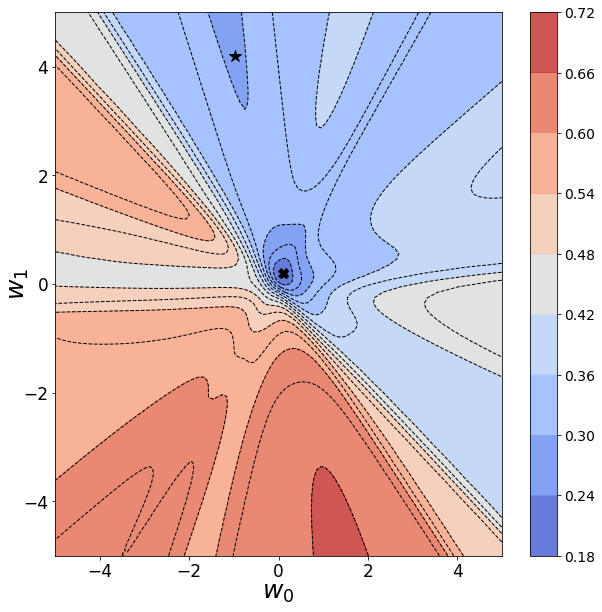

In [66]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)

levels=15 # set number of levels for contour plot
label_font_size = 25 # size of label fonts
tick_label_size= 17 # size of tick labels

ax1.tick_params(axis='both', which='major', labelsize=tick_label_size)
ax1.set_xlabel(r'$w_0$', fontsize=label_font_size, labelpad=0)
ax1.set_ylabel(r'$w_1$', fontsize=label_font_size, labelpad=-8)

# Mark 'global' minimum ("x"):
ax1.plot([0.08953984], [0.19334633], marker="X", color="black",markersize=10)

# Mark local minimum (asterix): 
ax1.plot([-0.97], [4.2], marker="*", color="black",markersize=12) 

# Contour plot & contourf plot: 
cp = ax1.contour(M1_mse, M2_mse, Z_mse,levels, colors='black', 
                     linestyles='dashed', linewidths=1)
cp = plt.contourf(M1_mse, M2_mse, Z_mse, alpha=0.85,cmap=cm.coolwarm)

cbar=plt.colorbar() # plot colorbar
cbar.ax.tick_params(labelsize=14) # set font size of colorbar 

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


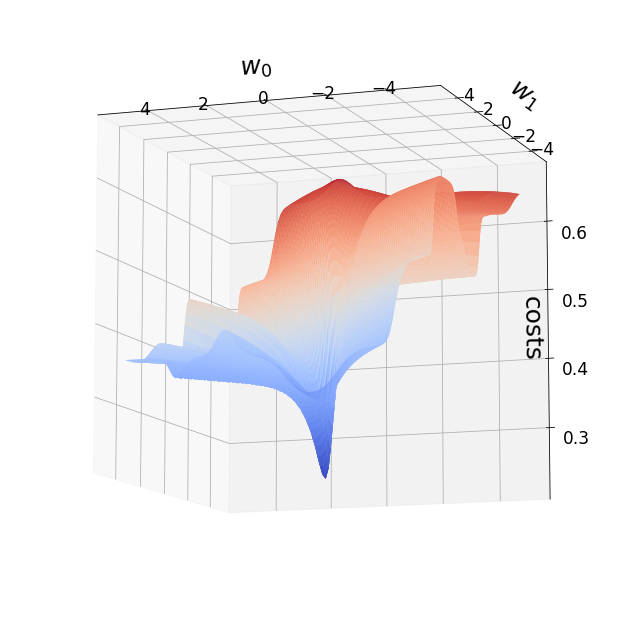

In [67]:
# Create animation of MSE-loss landscape: 

import matplotlib.animation as animation

fig = plt.figure(figsize=(9,9)) # create figure
label_font_size = 25 
tick_label_size= 17 
ax0=fig.add_subplot(111, projection="3d")
ax0.tick_params(axis='both', which='major', labelsize=tick_label_size)
ax0.set_xlabel(r'$w_0$', fontsize=label_font_size, labelpad=3)
ax0.set_ylabel(r'$w_1$', fontsize=label_font_size, labelpad=6)
ax0.set_zlabel("costs", fontsize=label_font_size, labelpad=-34)
ax0.tick_params(axis='both', which='major',
                labelsize=tick_label_size) 
ax0.tick_params(axis='x', pad=0, which='major', labelsize=tick_label_size) 
ax0.tick_params(axis='y', pad=2, which='major', labelsize=tick_label_size) 
ax0.tick_params(axis='z', pad=13, which='major', labelsize=tick_label_size) 
plt.tight_layout()

ini_azim=270 # initialize azimuth 
ini_elev=90 # initialize elevation 

def init():
    # Plot surface plot of costs (MSE-method): 
    ax0.plot_surface(M1_mse, M2_mse, Z_mse, rstride=1, cstride=1,
                     alpha=1,antialiased=True, cmap=cm.coolwarm, linewidth=2) 
    return fig,

def animate(i):
    # Change elevation and azimuth after each iteration: 
    if i<=n:
        ax0.view_init(elev=ini_elev-i*2, azim=ini_azim-i*8)
    elif i<=k:
        ax0.view_init(elev=ini_elev-n*2-(i-n)*2, azim=ini_azim  -n*8)
    else:
        ax0.view_init(elev=ini_elev-n*2-(k-n)*2, azim=ini_azim  -n*8)
    return fig,

n=20 
k=50 

# Create animation: 
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=80, interval=150, repeat=False  ) 

# Save gif: 
fn="MSE_loss_landscape" # file name
ani.save(fn+'.gif',writer='imagemagick',fps=5)  #fps: frames per second